<img src='https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/py_logo.png' />

### Static Image Export
New in version 3.2.0. It's now possible to programmatically export figures as high quality static images while fully offline.

#### Install Dependencies
Static image generation requires the [orca](https://github.com/plotly/orca) commandline utility and the [psutil](https://github.com/giampaolo/psutil) Python library. There are 3 general approach to installing these dependencies.

##### conda
Using the [conda](https://conda.io/docs/) package manager, you can install these dependencies in a single command:
```
$ conda install -c plotly plotly-orca psutil
```

**Note:** Even if you don't want to use conda to manage your Python dependencies, it is still useful as a cross platform tool for managing native libraries and command-line utilities (e.g. git, wget, graphviz, boost, gcc, nodejs, cairo, etc.).  For this use-case, start with [Miniconda](https://conda.io/miniconda.html) (~60MB) and tell the installer to add itself to your system `PATH`.  Then run `conda install plotly-orca` and the orca executable will be available system wide.

##### npm + pip
You can use the [npm](https://www.npmjs.com/get-npm) package manager to install `orca` (and its `electron` dependency), and then use pip to install `psutil`:

```
$ npm install -g electron@1.8.4 orca
$ pip install psutil
```

##### Standalone Binaries + pip
If you are unable to install conda or npm, you can install orca as a precompiled binary for your operating system. Follow the instructions in the orca [README](https://github.com/plotly/orca) to install orca and add it to your system `PATH`. Then use pip to install `psutil`.

```
$ pip install psutil
```

### Create a Figure
Now let's create a simple scatter plot with 100 random points of variying color and size.

In [9]:
import plotly.offline as py #import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os
import numpy as np

We'll configure the notebook for use in [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode

In [10]:
py.init_notebook_mode(connected=True)

In [11]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_scatter(x=x,
                y=y,
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       })
py.iplot(fig)

### Write Image File
The `plotly.io.write_image` function is used to write an image to a file or file-like python object.

Let's first create an output directory to store our images

In [12]:
if not os.path.exists('images'):
    os.mkdir('images')

If you are running this notebook live, click to [open the output directory](./images) so you can examine the images as they're written.

#### Raster Formats: PNG, JPEG, and WebP

Orca can output figures to several raster image formats including **PNG**, ...

In [13]:
pio.write_image(fig, 'images/fig1.png')

ValueError: 
The orca executable is required in order to export figures as static images,
but the executable that was found at '/usr/local/bin/orca'
does not seem to be a valid plotly orca executable. Please refer to the end of
this message for details on what went wrong.

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca.

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python

Here is the error that was returned by the command
    $ /usr/local/bin/orca --help

[Return code: 1]
module.js:549
    throw err;
    ^

Error: Cannot find module 'electron'
    at Function.Module._resolveFilename (module.js:547:15)
    at Function.Module._load (module.js:474:25)
    at Module.require (module.js:596:17)
    at require (internal/module.js:11:18)
    at Object.<anonymous> (/usr/local/lib/node_modules/orca/bin/orca.js:5:22)
    at Module._compile (module.js:652:30)
    at Object.Module._extensions..js (module.js:663:10)
    at Module.load (module.js:565:32)
    at tryModuleLoad (module.js:505:12)
    at Function.Module._load (module.js:497:3)

Note: When used on Linux, orca requires an X11 display server, but none was
detected. Please install Xvfb and configure plotly.py to run orca using Xvfb
as follows:

    >>> import plotly.io as pio
    >>> pio.orca.config.use_xvfb = True
    
You can save this configuration for use in future sessions as follows:
    >>> pio.orca.config.save() 
    
See https://www.x.org/releases/X11R7.6/doc/man/man1/Xvfb.1.xhtml
for more info on Xvfb


**JPEG**, ...

In [7]:
pio.write_image(fig, 'images/fig1.jpeg')

and **WebP**

In [8]:
pio.write_image(fig, 'images/fig1.webp')

#### Vector Formats: SVG and PDF...

Orca can also output figures in several vector formats including **SVG**, ...

In [9]:
pio.write_image(fig, 'images/fig1.svg')

**PDF**, ...

In [10]:
pio.write_image(fig, 'images/fig1.pdf')

and **EPS** (requires the poppler library)

In [11]:
pio.write_image(fig, 'images/fig1.eps')

**Note:** It is important to note that any figures containing WebGL traces (i.e. of type `scattergl`, `heatmapgl`, `contourgl`, `scatter3d`, `surface`, `mesh3d`, `scatterpolargl`, `cone`, `streamtube`, `splom`, or `parcoords`) that are exported in a vector format will include encapsulated rasters, instead of vectors, for some parts of the image.

### Get Image as Bytes
The `plotly.io.to_image` function is used to return an image as a bytes object.

Let convert the figure to a **PNG** bytes object...

In [12]:
img_bytes = pio.to_image(fig, format='png')

and then display the first 20 bytes.

In [13]:
img_bytes[:20]

'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc'

#### Display Bytes as Image Using `IPython.display.Image`
A bytes object representing a PNG image can be displayed directly in the notebook using the `IPython.display.Image` class. This also works in the [Qt Console for Jupyter](https://qtconsole.readthedocs.io/en/stable/)!

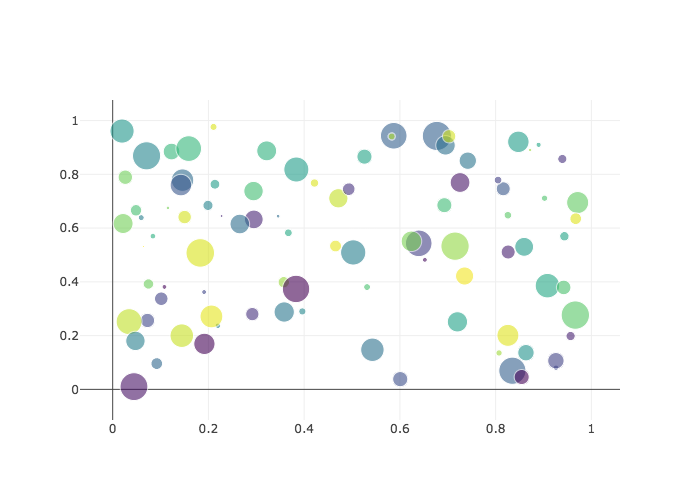

In [14]:
from IPython.display import Image
Image(img_bytes)

### Change Image Dimensions and Scale
In addition to the image format, the `to_image` and `write_image` functions provide arguments to specify the image `width` and `height` in logical pixels. They also provide a `scale` parameter that can be used to increase (`scale` > 1) or decrease (`scale` < 1) the physical resolution of the resulting image.

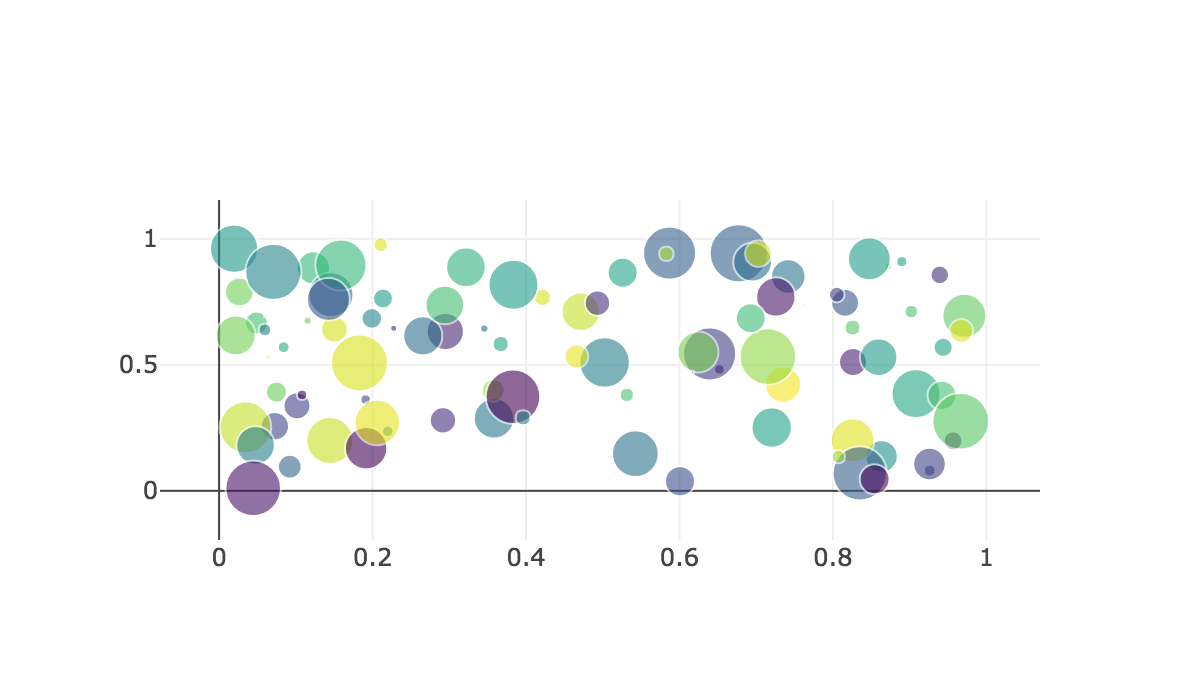

In [15]:
img_bytes = pio.to_image(fig, format='png', width=600, height=350, scale=2)
Image(img_bytes)

### Summary
In summary, to export high-quality static images from plotly.py all you need to do is install orca and psutil and then use the `plotly.io.write_image` and `plotly.io.to_image` functions.

If you want to know more about how the orca integration works, or if you need to troubleshoot an issue, please check out the [Orca Management](../orca-management/) section.

### Plotly Offline from Command Line
You can plot your graphs from a python script from command line. On executing the script, it will open a web browser with your Plotly Graph drawn.

In [2]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'file:///Users/Chelsea/Repos/documentation/_posts/python/offline/temp-plot.html'

#### Generating Offline Graphs within Jupyter Notebook
You can also plot your graphs offline inside a Jupyter Notebook Environment. First you need to initiate the Plotly Notebook mode as below:

In [3]:
init_notebook_mode(connected=True)

Run at the start of every ipython notebook to use plotly.offline. This injects the plotly.js source files into the notebook.

In [4]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [5]:
import plotly.graph_objs as go

import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

#### Plotting Offline with Cufflinks

In [6]:
import cufflinks as cf

iplot(cf.datagen.lines().iplot(asFigure=True,
                               kind='scatter',xTitle='Dates',yTitle='Returns',title='Returns'))

#### Use with the Cloud
All methods in plotly.plotly will communicate with a Chart Studio Cloud or Chart Studio Enterprise. <br>
`get_figure` downloads a figure from plot.ly or Chart Studio Enterprise.<br> 
You need to provide credentials to download figures: https://plot.ly/python/getting-started/

In [7]:
import plotly.plotly as py 

fig = py.get_figure('https://plot.ly/~jackp/8715', raw=True)
iplot(fig)

#### Static Image Export

The `plotly.io.to_image` function can then be used to convert a plotly figure to a static image bytes string.

In [8]:
import plotly.io as pio

static_image_bytes = pio.to_image(fig, format='png')

Use `IPython.display.Image` to display the image bytes as image in the notebook

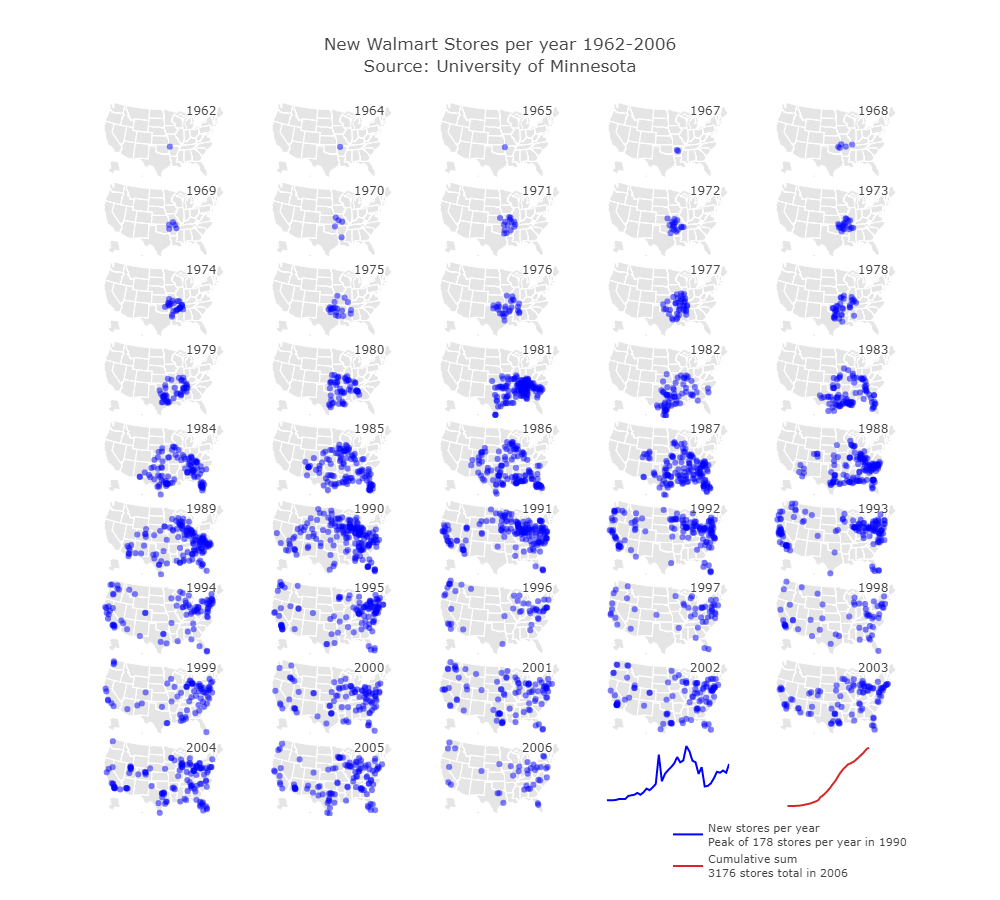

In [9]:
from IPython.display import Image

Image(static_image_bytes)

Use `plotly.io.write_image` to convert a figure to a static image and write it to a file or writeable object.

Make sure to add a file extension or specify the file type using the format parameter.

In [10]:
pio.write_image(fig, file='plotly_static_image.png', format='png')

#### Reference
For more information, run `help(plotly.offline.iplot)` or `help(plotly.offline.plot)` or `help(plotly.io.to_image)` or `help(plotly.io.write_image)`